<a href="https://colab.research.google.com/github/arijdavis/CAP4630/blob/master/Hw2/Hw2_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of MNIST digits with dense layers

## Loading the image data

In [0]:
%matplotlib inline
import math
import numpy as np

from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


# Hw2 Normalize the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## Deplaying some of the original and prepared image data and labels

In [0]:
train_images.shape

(60000, 784)

In [0]:
train_images_original.shape

(60000, 28, 28)

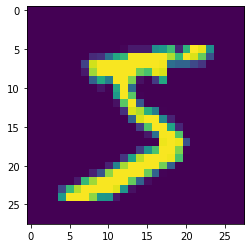

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[0])
plt.show()

In [0]:
#TESTING CODE
def truncate1(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

def round_up1(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

In [0]:
width_feature = np.zeros((1))

shade_value = 0

starting_index = 0
while shade_value <= 0:
  starting_index = starting_index + 1
  shade_value = train_images[0][starting_index] 

starting_index = int(round_up1(starting_index / 28) * 28)

shade_value = 0
while shade_value <= 0:
  starting_index = starting_index - 1
  shade_value = train_images[0][starting_index]

shade_value = 0
ending_index = 784
while shade_value <= 0:
  ending_index = ending_index - 1
  shade_value = train_images[0][ending_index] 

ending_index = int(truncate1( ending_index / 28) * 28)

shade_value = 0
while shade_value <= 0:
  ending_index = ending_index + 1
  shade_value = train_images[0][ending_index]

start_size = truncate1(starting_index / 28)
end_size = truncate1(ending_index / 28)

width_feature[0] = end_size - start_size


In [0]:
start_size

5.0

In [0]:
end_size

24.0

In [0]:
width_feature[0]

19.0

In [0]:
starting_index

163

In [0]:
ending_index

676

In [0]:
white_space_feature = np.zeros((784))

for i in range(784):
  shade_value = train_images[0][i]

  if shade_value > 0:
    white_space_feature[i] = 1


In [0]:
height_feature = np.zeros((1))

shade_value = 0

starting_index = 0
while shade_value <= 0:
   starting_index = starting_index + 1
   shade_value = train_images[0][starting_index] 

shade_value = 0
ending_index = 784
while shade_value <= 0:
  ending_index = ending_index - 1
  shade_value = train_images[0][ending_index] 

start_size = truncate1(starting_index / 28)
end_size = truncate1(ending_index / 28)

height_feature[0] = end_size - start_size



In [0]:
start_size

5.0

In [0]:
end_size

24.0

In [0]:
starting_index

152

In [0]:
ending_index

683

In [0]:
height_feature

array([19.])

In [0]:
white_space_feature

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
train_labels.shape

(60000, 10)

In [0]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import numpy as np

In [0]:
np.argmax(train_labels[0])

5

In [0]:
train_labels_original[0]

5

## Hw2 Simple model consisting of a single dense layer with softmax activation.

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(786,)))
network.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7870      
Total params: 7,870
Trainable params: 7,870
Non-trainable params: 0
_________________________________________________________________


## The compilation step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Hw2 Handcrafted Features

In [0]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

In [0]:
features = np.zeros((60000,1))

# Height of MNIST Feature
for i in np.arange(60000):
  shade_value = 0

  starting_index = 0
  while shade_value <= 0:
    starting_index = starting_index + 1
    shade_value = train_images[i][starting_index] 

  shade_value = 0
  ending_index = 784
  while shade_value <= 0:
    ending_index = ending_index - 1
    shade_value = train_images[i][ending_index] 

  start_size = truncate(starting_index / 28)
  end_size = truncate(ending_index / 28)

  features[i]= end_size - start_size
  

In [0]:
test_features = np.zeros((10000,1))

for i in np.arange(10000):
  shade_value = 0

  starting_index = 0
  while shade_value <= 0:
    starting_index = starting_index + 1
    shade_value = test_images[i][starting_index] 

  shade_value = 0
  ending_index = 784
  while shade_value <= 0:
    ending_index = ending_index - 1
    shade_value = test_images[i][ending_index] 

  start_size = truncate(starting_index / 28)
  end_size = truncate(ending_index / 28)

  test_features[i]= end_size - start_size

In [0]:
# Width of MNIST
features2 = np.zeros((60000,1))

for i in np.arange(60000):
  shade_value = 0

  starting_index = 0
  while shade_value <= 0:
    starting_index = starting_index + 1
    shade_value = train_images[i][starting_index] 

  starting_index = int(round_up(starting_index / 28) * 28)

  shade_value = 0
  while shade_value <= 0:
    starting_index = starting_index - 1
    shade_value = train_images[i][starting_index]

  shade_value = 0
  ending_index = 784
  while shade_value <= 0:
    ending_index = ending_index - 1
    shade_value = train_images[i][ending_index] 

  ending_index = int(truncate1( ending_index / 28) * 28)

  shade_value = 0
  while shade_value <= 0:
    ending_index = ending_index + 1
    shade_value = train_images[i][ending_index]

  start_size = truncate(starting_index / 28)
  end_size = truncate(ending_index / 28)

  features2[i]= end_size - start_size

In [0]:
test_features2 = np.zeros((10000,1))

for i in np.arange(10000):
  shade_value = 0

  starting_index = 0
  while shade_value <= 0:
    starting_index = starting_index + 1
    shade_value = test_images[i][starting_index] 

  starting_index = int(round_up(starting_index / 28) * 28)

  shade_value = 0
  while shade_value <= 0:
    starting_index = starting_index - 1
    shade_value = test_images[i][starting_index]

  shade_value = 0
  ending_index = 784
  while shade_value <= 0:
    ending_index = ending_index - 1
    shade_value = test_images[i][ending_index] 

  ending_index = int(truncate1( ending_index / 28) * 28)

  shade_value = 0
  while shade_value <= 0:
    ending_index = ending_index + 1
    shade_value = test_images[i][ending_index]

  start_size = truncate(starting_index / 28)
  end_size = truncate(ending_index / 28)

  test_features2[i]= end_size - start_size

In [0]:
# Add the feature to the input vector

new_train_images = np.concatenate((train_images, features), axis=1)
new_train_images = np.concatenate((new_train_images, features2), axis=1)

new_test_images = np.concatenate((test_images, test_features), axis=1)
new_test_images = np.concatenate((new_test_images, test_features2), axis=1)

In [0]:
new_train_images

array([[ 0.,  0.,  0., ...,  0., 19., 19.],
       [ 0.,  0.,  0., ...,  0., 19., 19.],
       [ 0.,  0.,  0., ...,  0., 19., 19.],
       ...,
       [ 0.,  0.,  0., ...,  0., 19., 19.],
       [ 0.,  0.,  0., ...,  0., 19., 19.],
       [ 0.,  0.,  0., ...,  0., 18., 18.]])

## The training step

In [0]:
epochs = 10
history = network.fit(new_train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(new_test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 3s 45us/step - loss: 0.6115 - acc: 0.8422 - val_loss: 0.3362 - val_acc: 0.9080
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3252 - acc: 0.9086 - val_loss: 0.2956 - val_acc: 0.9145
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.2976 - acc: 0.9160 - val_loss: 0.2836 - val_acc: 0.9182
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2847 - acc: 0.9195 - val_loss: 0.2750 - val_acc: 0.9228
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2769 - acc: 0.9214 - val_loss: 0.2769 - val_acc: 0.9209
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2719 - acc: 0.9230 - val_loss: 0.2697 - val_acc: 0.9256
Epoch 7/10
60000/60000 [==

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

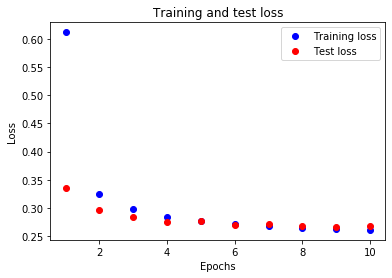

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

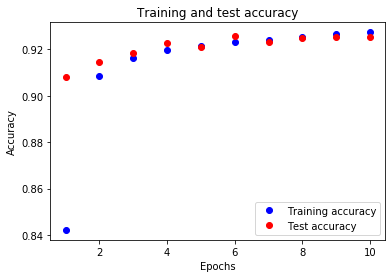

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()